In [2]:
import numpy as np
import sympy as sym
import control as ctrl
import matplotlib.pyplot as plt

from matplotlib import cm
from scipy.integrate import odeint

#%matplotlib ipympl # pip install ipympl

In [3]:
def mass_spring(y, t, m, g, b, k):
    x1, x2 = y

    dxdt = [x2,
            g - (b/m)*x2 - (k/m)*x1]

    return dxdt

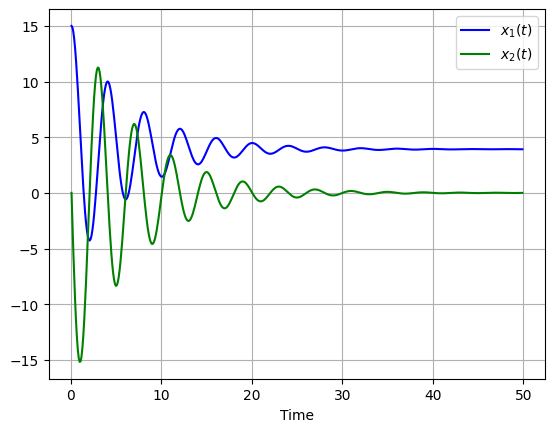

<Figure size 640x480 with 0 Axes>

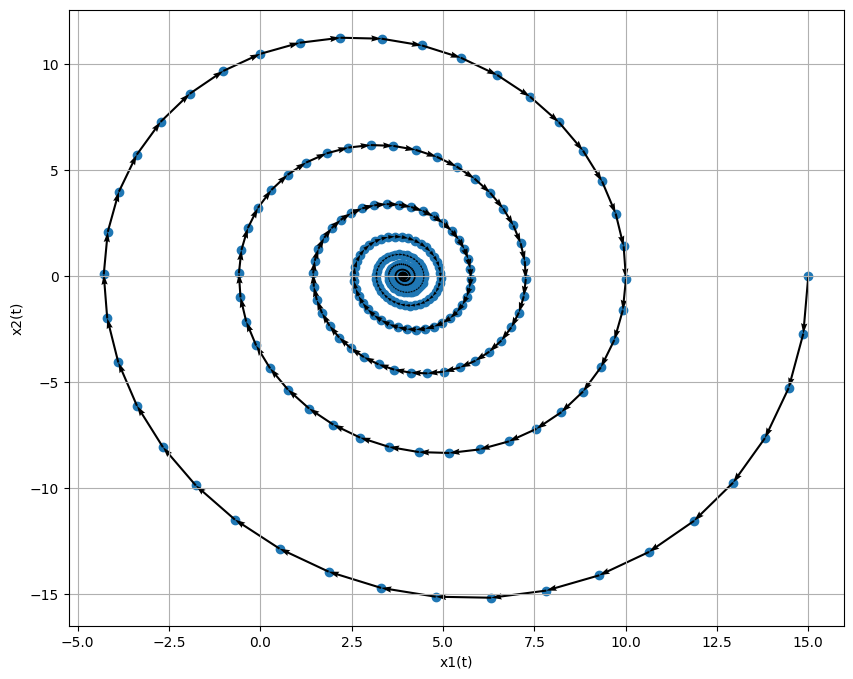

In [4]:
# Parameters of the system
m = 1 # mass [Kg]
k = 2.5 # spring coefficient
b = 0.3 # damping coefficient
g = 9.81 # gravity [m/s²]

# Initial conditions
y0 = [15, 0.0]

# Parameters of simulation
h = 1e-1
tfin = 50
N = np.int64(np.ceil((tfin-h)/h))
t = h + np.arange(0,N)*h

sol = odeint(mass_spring, y0, t, args=(m, g, b, k))

plt.figure()
plt.plot(t, sol[:, 0], 'b', label = r'$x_1(t)$')
plt.plot(t, sol[:, 1], 'g', label = r'$x_2(t)$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.grid()
plt.show()

plt.figure()
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(sol[:, 0], sol[:, 1])
q = ax.quiver(sol[:-1, 0], sol[:-1, 1], sol[1:, 0] - sol[:-1, 0], sol[1:, 1] - sol[:-1, 1], scale_units = 'xy', angles = 'xy', scale = 1, color = 'black')
ax.quiverkey(q, X = np.max(sol[:, 0]), Y = np.max(sol[:, 1]), U=1, label='Quiver key, length = 10', labelpos='E', color = 'red')
plt.xlabel('x1(t)')
plt.ylabel('x2(t)')
plt.grid()
plt.show()

In [5]:
x1 = np.linspace(-np.max(sol[:, 0]), np.max(sol[:, 0]), 50)
x2 = np.linspace(-np.max(sol[:, 1]), np.max(sol[:, 1]), 50)

X1, X2 = np.meshgrid(x1, x2)

V = lambda x1, x2: x1**2 + 4*x1*x2 + 3*x2**2
u = 2*X1 + 4*X2
v = 4*X1 + 6*X2

#V = lambda x1, x2: x1**2 + x2**2
#u = 2*X1
#v = 2*X2

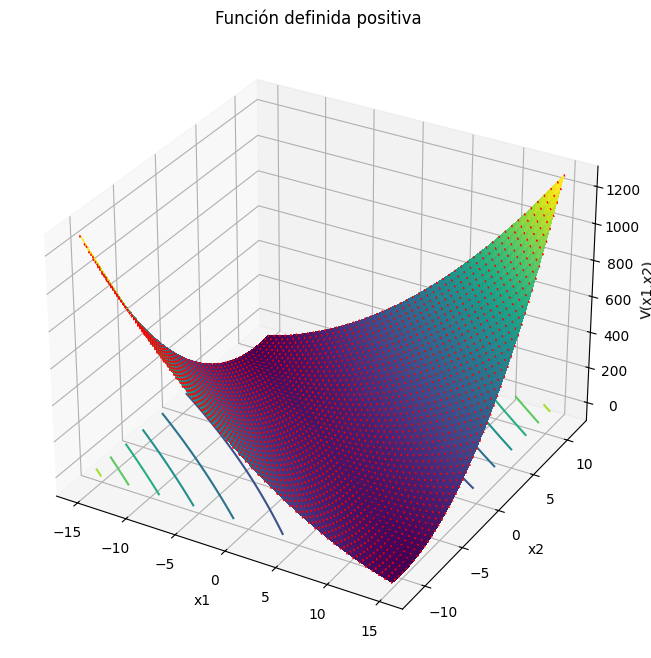

In [6]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,8))
surf = ax.plot_surface(X1, X2, V(X1,X2), cmap = 'viridis', linewidth=0, antialiased=False)
ax.quiver(X1, X2, V(X1, X2), u, v, 0, length=0.1, normalize=True, color = 'red')
ax.contour(X1, X2, V(X1,X2), cmap = 'viridis', offset = -1)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('V(x1,x2)')
plt.title('Función definida positiva')
plt.show()

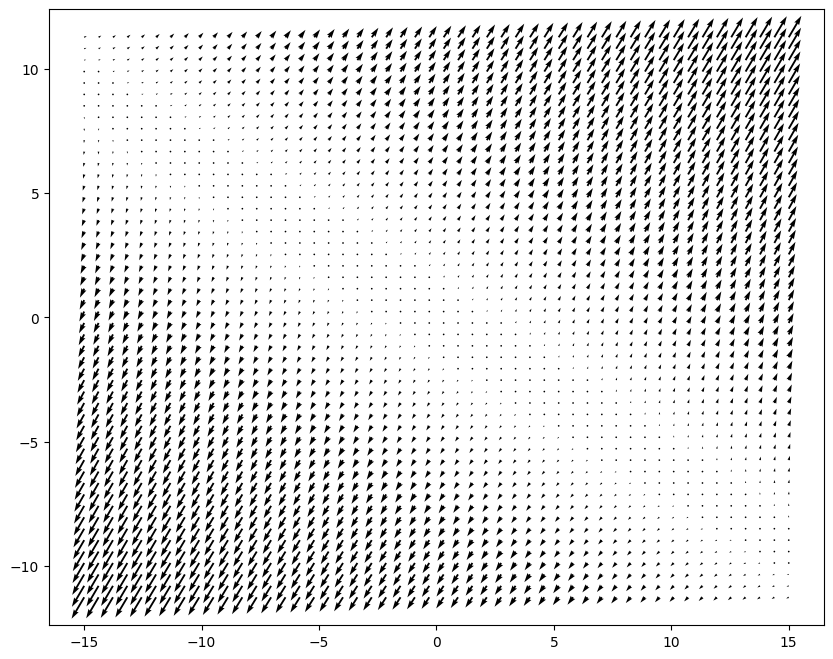

In [7]:
fig, ax = plt.subplots(figsize=(10,8))
q = ax.quiver(X1, X2, u, v)
ax.quiverkey(q, X = np.max(X1), Y = np.max(X2), U=1,
             label='Quiver key, length = 10', labelpos='E')

plt.show()

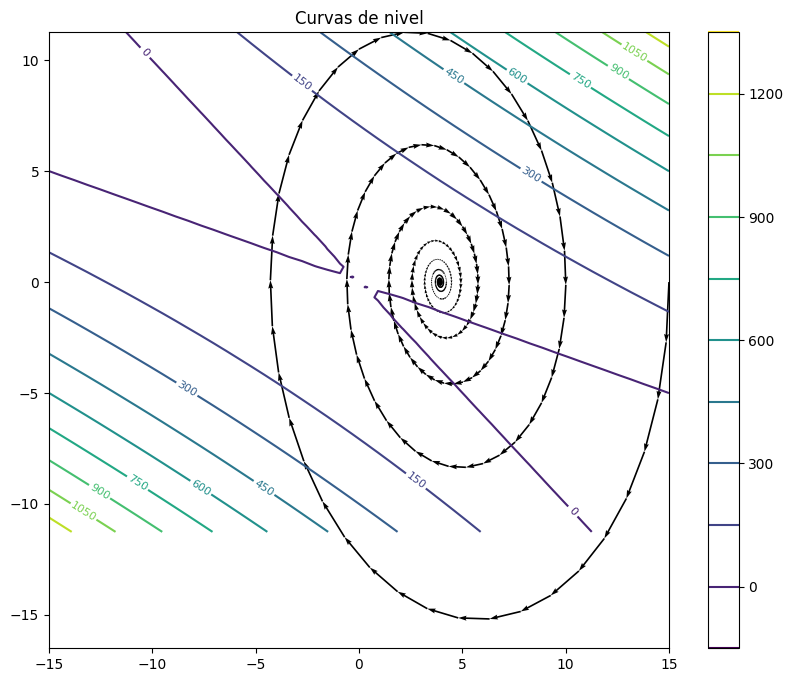

In [8]:
plt.figure(figsize=(10,8))
contours = plt.contour(X1, X2, V(X1,X2), 10)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
q = plt.quiver(sol[:-1, 0], sol[:-1, 1], sol[1:, 0] - sol[:-1, 0], sol[1:, 1] - sol[:-1, 1], scale_units = 'xy', angles = 'xy', scale = 1)
plt.quiverkey(q, X = np.max(sol[:, 0]), Y = np.max(sol[:, 1]), U=1,
             label='Quiver key, length = 10', labelpos='E')
plt.title('Curvas de nivel')
plt.show()

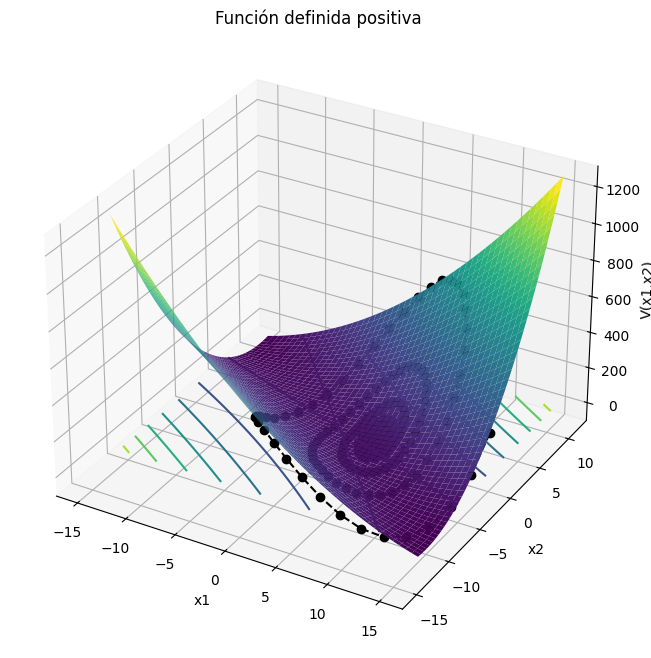

In [9]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,8))
surf = ax.plot_surface(X1, X2, V(X1,X2), cmap = 'viridis', linewidth=0, antialiased=True)
ax.contour(X1, X2, V(X1,X2), cmap = 'viridis', offset = -1)
ax.plot3D(sol[:, 0], sol[:, 1], V(sol[:, 0], sol[:, 1]), 'o--k')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('V(x1,x2)')
plt.title('Función definida positiva')
plt.show()

In [10]:
def mass_spring_trans(y, t, m, g, b, k):
    x1, x2 = y

    dxdt = [x2,
            g - (b/m)*x2 - (k/m)*(x1 + (m*g)/k)]

    return dxdt

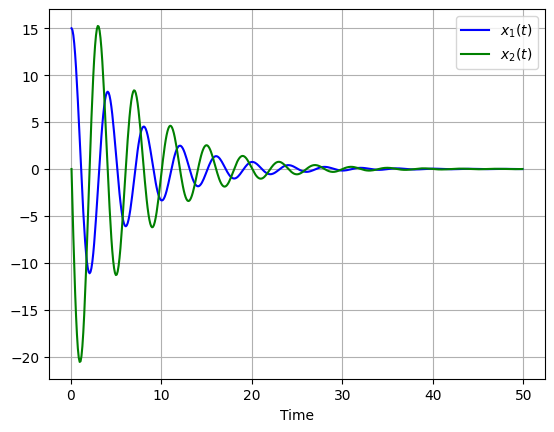

<Figure size 640x480 with 0 Axes>

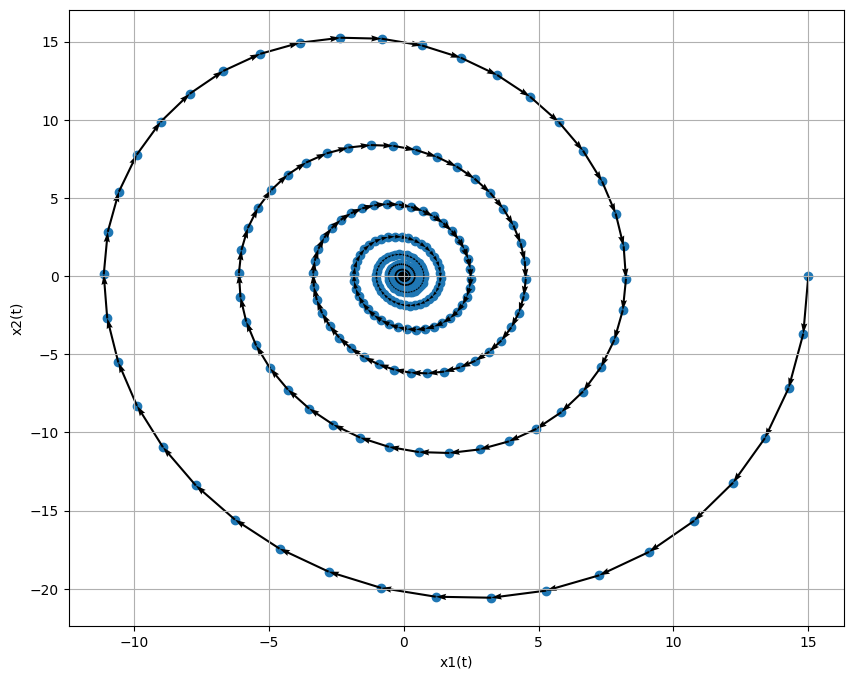

In [11]:
# Parameters of the system
m = 1 # mass [Kg]
k = 2.5 # spring coefficient
b = 0.3 # damping coefficient
g = 9.81 # gravity [m/s²]

# Initial conditions
y0 = [15, 0.0]

# Parameters of simulation
h = 1e-1
tfin = 50
N = np.int64(np.ceil((tfin-h)/h))
t = h + np.arange(0,N)*h

sol_tr = odeint(mass_spring_trans, y0, t, args=(m, g, b, k))

plt.figure()
plt.plot(t, sol_tr[:, 0], 'b', label = r'$x_1(t)$')
plt.plot(t, sol_tr[:, 1], 'g', label = r'$x_2(t)$')
plt.legend(loc='best')
plt.xlabel('Time')
plt.grid()
plt.show()

plt.figure()
fig, ax = plt.subplots(figsize=(10,8))
ax.scatter(sol_tr[:, 0], sol_tr[:, 1])
q = ax.quiver(sol_tr[:-1, 0], sol_tr[:-1, 1], sol_tr[1:, 0] - sol_tr[:-1, 0], sol_tr[1:, 1] - sol_tr[:-1, 1], scale_units = 'xy', angles = 'xy', scale = 1, color = 'black')
ax.quiverkey(q, X = np.max(sol_tr[:, 0]), Y = np.max(sol_tr[:, 1]), U=1, label='Quiver key, length = 10', labelpos='E', color = 'red')
plt.xlabel('x1(t)')
plt.ylabel('x2(t)')
plt.grid()
plt.show()

In [12]:
x1 = np.linspace(-np.max(sol_tr[:, 0]), np.max(sol_tr[:, 0]), 50)
x2 = np.linspace(-np.max(sol_tr[:, 1]), np.max(sol_tr[:, 1]), 50)

X1, X2 = np.meshgrid(x1, x2)

V = lambda x1, x2: x1**2 + 4*x1*x2 + 3*x2**2
u = 2*X1 + 4*X2
v = 4*X1 + 6*X2

#V = lambda x1, x2: x1**2 + x2**2
#u = 2*X1
#v = 2*X2

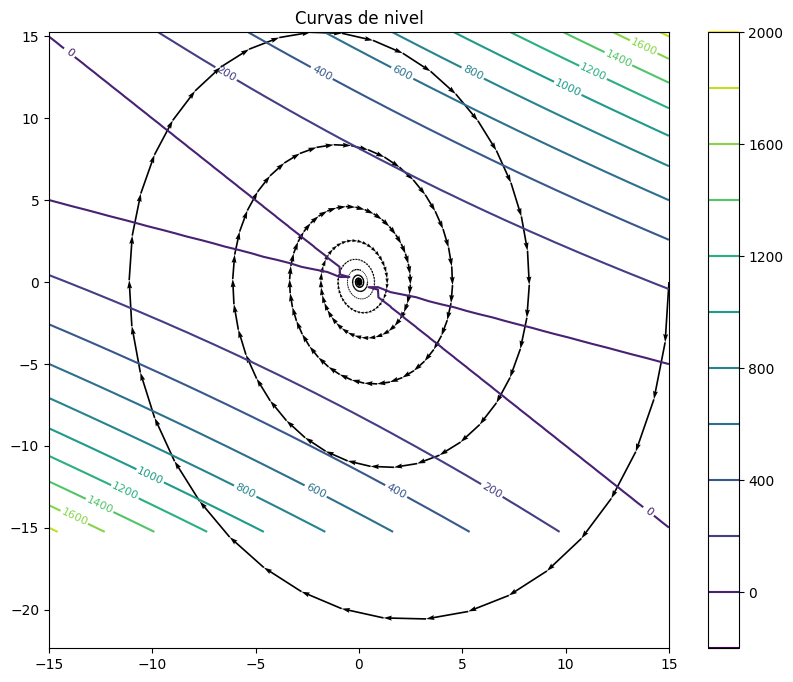

In [13]:
plt.figure(figsize=(10,8))
contours = plt.contour(X1, X2, V(X1,X2), 10)
plt.clabel(contours, inline=True, fontsize=8)
plt.colorbar()
q = plt.quiver(sol_tr[:-1, 0], sol_tr[:-1, 1], sol_tr[1:, 0] - sol_tr[:-1, 0], sol_tr[1:, 1] - sol_tr[:-1, 1], scale_units = 'xy', angles = 'xy', scale = 1)
plt.quiverkey(q, X = np.max(sol_tr[:, 0]), Y = np.max(sol_tr[:, 1]), U=1,
             label='Quiver key, length = 10', labelpos='E')
plt.title('Curvas de nivel')
plt.show()

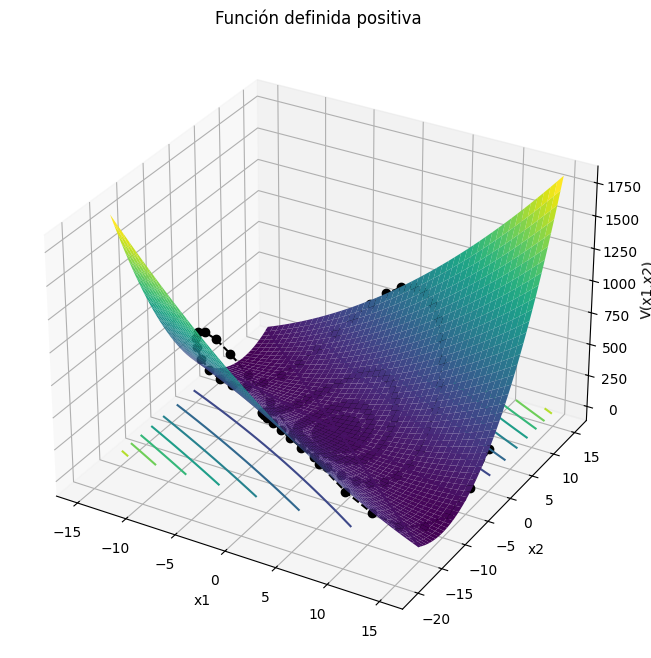

In [14]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,8))
surf = ax.plot_surface(X1, X2, V(X1,X2), cmap = 'viridis', linewidth=0, antialiased=True)
ax.contour(X1, X2, V(X1,X2), cmap = 'viridis', offset = -1)
ax.plot3D(sol_tr[:, 0], sol_tr[:, 1], V(sol_tr[:, 0], sol_tr[:, 1]), 'o--k')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('V(x1,x2)')
plt.title('Función definida positiva')
plt.show()